In [1]:
import sys, os
import sparse
import xsimlab as xs
import numpy as np
import pandas as pd
import igraph as ig

In [2]:
sys.path.insert(0, os.path.join(os.getcwd(), '..'))
import vmlab
from vmlab.processes import topology, environment, phenology

In [3]:
model = xs.Model({
    'environment': environment.Environment,
    'topology': topology.Topology,
    'phenology': phenology.Phenology
})

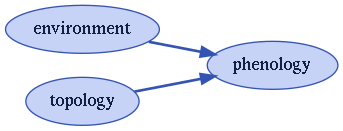

In [4]:
model.visualize()

In [5]:
nb_gus = 1
g = ig.Graph.Tree(nb_gus, 2, mode=ig.TREE_OUT)
adjacency = np.array(g.get_adjacency().data)

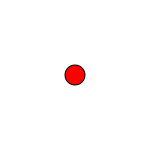

In [6]:
ig.plot(g, bbox=(0,0,150,150), layout=g.layout_reingold_tilford())

In [9]:
ds = vmlab.create_setup(
    model=model,
    setup_toml='../share/setup/vmango.toml',
    clocks={
        'day': pd.date_range(start='2002-10-01', end='2003-03-31', freq="1d")
    },
    main_clock='day',
    input_vars={
        'topology': {
            'adjacency': adjacency,
            'nb_leaf': np.ones(nb_gus),
            'nb_inflo': np.ones(nb_gus),
            'nb_fruit': np.ones(nb_gus),
        },
        'phenology': {
            'bloom_date': np.full(nb_gus, '2002-11-01')
        }
    }
)

/home/jvail/cirad/jvail/vmango-lab/notebooks/../vmlab/vmlab.py:116: UserWarning: Process "carbon_balance" does not exist
  warnings.warn(f'Process "{prc_name}" does not exist')
/home/jvail/cirad/jvail/vmango-lab/notebooks/../vmlab/vmlab.py:116: UserWarning: Process "fruit_growth" does not exist
  warnings.warn(f'Process "{prc_name}" does not exist')
/home/jvail/cirad/jvail/vmango-lab/notebooks/../vmlab/vmlab.py:116: UserWarning: Process "fruit_quality" does not exist
  warnings.warn(f'Process "{prc_name}" does not exist')
/home/jvail/cirad/jvail/vmango-lab/notebooks/../vmlab/vmlab.py:116: UserWarning: Process "light_interception" does not exist
  warnings.warn(f'Process "{prc_name}" does not exist')
/home/jvail/cirad/jvail/vmango-lab/notebooks/../vmlab/vmlab.py:116: UserWarning: Process "photosynthesis" does not exist
  warnings.warn(f'Process "{prc_name}" does not exist')


In [10]:
ds_out = ds.xsimlab.run(model=model, decoding={ 'mask_and_scale': False }, hooks=[xs.monitoring.ProgressBar()])

             0% | initialize 

In [11]:
ds_out

<xarray.Dataset>
Dimensions:                           (GU: 1, day: 182, hour: 24)
Coordinates:
  * GU                                (GU) <U10 'GU0'
  * day                               (day) datetime64[ns] 2002-10-01 ... 200...
  * hour                              (hour) int8 0 1 2 3 4 5 ... 19 20 21 22 23
Data variables:
    environment__GR                   (day, hour) float64 0.0 0.0 ... 0.0 0.0
    environment__RH                   (day, hour) float64 75.0 73.0 ... 83.0
    environment__TM                   (day) float64 22.15 21.7 ... 25.9 25.9
    environment__TM_air               (day, hour) float64 21.5 21.5 ... 25.9
    environment__T_air                (day, hour) float64 17.6 17.8 ... 19.6
    environment__T_fruit              (day, hour) float64 17.6 17.8 ... 19.6
    environment__parameter_file_path  <U45 '../share/setup/../parameters/envi...
    phenology__DAB                    (day, GU) float64 -1.0 -1.0 ... 149.0
    phenology__bloom_date             (GU) datetime64[D] 2002-11-01
    phenology__dd_cum                 (day, GU) float64 0.0 0.0 ... 1.448e+03
    phenology__dd_delta               (day, GU) float64 0.0 0.0 0.0 ... 9.9 9.9
    phenology__gu_growth_tts          (day, GU) float64 12.95 ... 2.867e+03
    phenology__gu_pheno_tts           (day, GU) float64 8.772 17.09 ... 0.0 0.0
    phenology__gu_stage               (day, GU) float64 0.2279 0.444 ... 4.0 4.0
    phenology__inflo_growth_tts       (day, GU) float64 11.03 ... 2.519e+03
    phenology__inflo_pheno_tts        (day, GU) float64 11.05 21.65 ... 0.0 0.0
    phenology__inflo_stage            (day, GU) float64 0.1566 0.3068 ... 5.0
    phenology__leaf_growth_tts        (day, GU) float64 11.42 22.39 ... 2.59e+03
    phenology__leaf_pheno_tts         (day, GU) float64 0.0 0.0 0.0 ... 0.0 0.0
    phenology__parameter_file_path    <U43 '../share/setup/../parameters/phen...
    topology__adjacency               (day, GU, GU) int64 0 0 0 0 0 ... 0 0 0 0
    topology__nb_fruit                (day, GU) float64 1.0 1.0 1.0 ... 1.0 1.0
    topology__nb_inflo                (day, GU) float64 1.0 1.0 1.0 ... 1.0 1.0
    topology__nb_leaf                 (day, GU) float64 1.0 1.0 1.0 ... 1.0 1.0

<AxesSubplot:xlabel='day'>

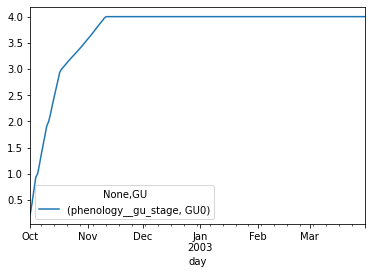

In [12]:
ds_out.phenology__gu_stage.to_dataframe().unstack(level='GU').plot()

<AxesSubplot:xlabel='day'>

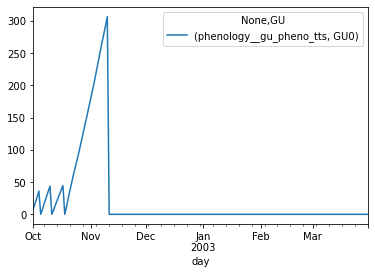

In [13]:
ds_out.phenology__gu_pheno_tts.to_dataframe().unstack(level='GU').plot()

<AxesSubplot:xlabel='day'>

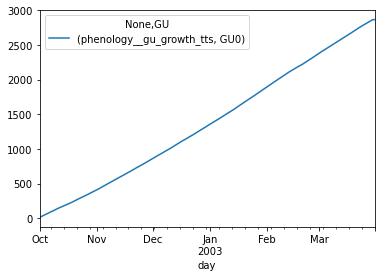

In [14]:
ds_out.phenology__gu_growth_tts.to_dataframe().unstack(level='GU').plot()

<AxesSubplot:xlabel='day'>

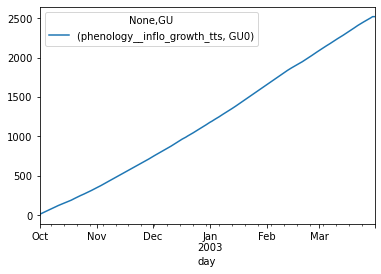

In [15]:
ds_out.phenology__inflo_growth_tts.to_dataframe().unstack(level='GU').plot()

<AxesSubplot:xlabel='day'>

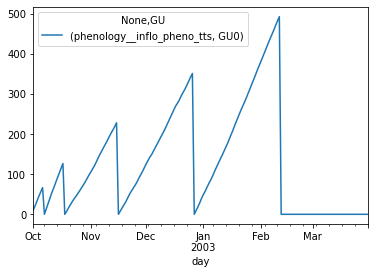

In [16]:
ds_out.phenology__inflo_pheno_tts.to_dataframe().unstack(level='GU').plot()

<AxesSubplot:xlabel='day'>

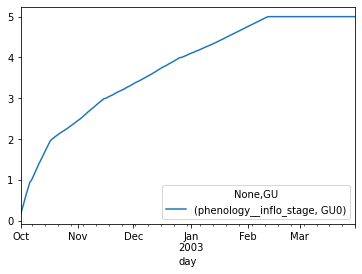

In [17]:
ds_out.phenology__inflo_stage.to_dataframe().unstack(level='GU').plot()

<AxesSubplot:xlabel='day'>

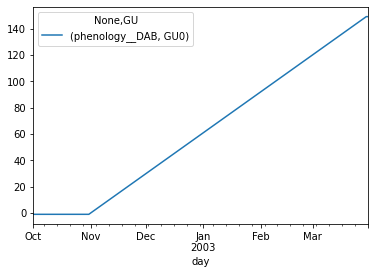

In [18]:
ds_out.phenology__DAB.to_dataframe().unstack(level='GU').plot()